In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

from config import config

df_btc = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "btc.csv",
    parse_dates=["date"],
    index_col="date",
)
df_btc_original = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "btc_original.csv",
    parse_dates=["date"],
    index_col="date",
)

df_eth = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "eth.csv",
    parse_dates=["date"],
    index_col="date",
)
df_eth_original = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "eth_original.csv",
    parse_dates=["date"],
    index_col="date",
)

In [5]:
df_btc.head()

,open,high,low,close,volume,marketCap,logPriceChange,priceMovement,localMin_7,localMax_7,...,CR,PSAR_down,PSAR_up,gTrendsBitcoin,gTrendsBlockchain,gTrendsCryptocurrency,gTrendsInvesting,goldValue,sp500Value,gnews_average_score
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,963.658,1003.08,958.699,998.325,147775008.0,1.605041e+10,0.035254,1,0,1,...,66.168065,0,1,6,16,1,37,1160.400024,2257.830078,8.75
2017-01-02,998.617,1031.39,996.702,1021.750,222184992.0,1.642902e+10,0.023193,1,0,1,...,69.774625,0,1,6,16,1,37,NaN,NaN,9.00
2017-01-03,1021.600,1044.08,1021.600,1043.840,185168000.0,1.678637e+10,0.021389,1,0,1,...,72.727175,0,1,6,16,1,37,1160.400024,2257.830078,8.25
2017-01-04,1044.400,1159.42,1044.400,1154.730,344945984.0,1.857187e+10,0.100960,1,0,1,...,82.152330,0,1,6,16,1,37,1163.800049,2270.750000,5.00
2017-01-05,1156.730,1191.10,910.417,1013.380,510199008.0,1.630025e+10,-0.130575,0,0,0,...,23.543196,1,0,6,16,1,37,1179.699951,2269.000000,7.75


In [6]:
# align indexes
common_index = df_btc_original.index.intersection(df_btc.index)

# filter for common indices
df_btc_original_aligned = df_btc_original.loc[common_index]
df_btc_aligned = df_btc.loc[common_index]

# calculate the correlation
corr_btc = np.corrcoef(df_btc_original_aligned['close'], df_btc_aligned['gnews_average_score'])[0, 1]
print(f"BTC Close Price vs Sentiment Average Score Correlation: {corr_btc:.2f}")


common_index_eth = df_eth_original.index.intersection(df_eth.index)
df_eth_original_aligned = df_eth_original.loc[common_index_eth]
df_eth_aligned = df_eth.loc[common_index_eth]
corr_eth = np.corrcoef(df_eth_original_aligned['close'], df_eth_aligned['gnews_average_score'])[0, 1]
print(f"ETH Close Price vs Sentiment Average Score Correlation: {corr_eth:.2f}")


BTC Close Price vs Sentiment Average Score Correlation: 0.11
ETH Close Price vs Sentiment Average Score Correlation: 0.30


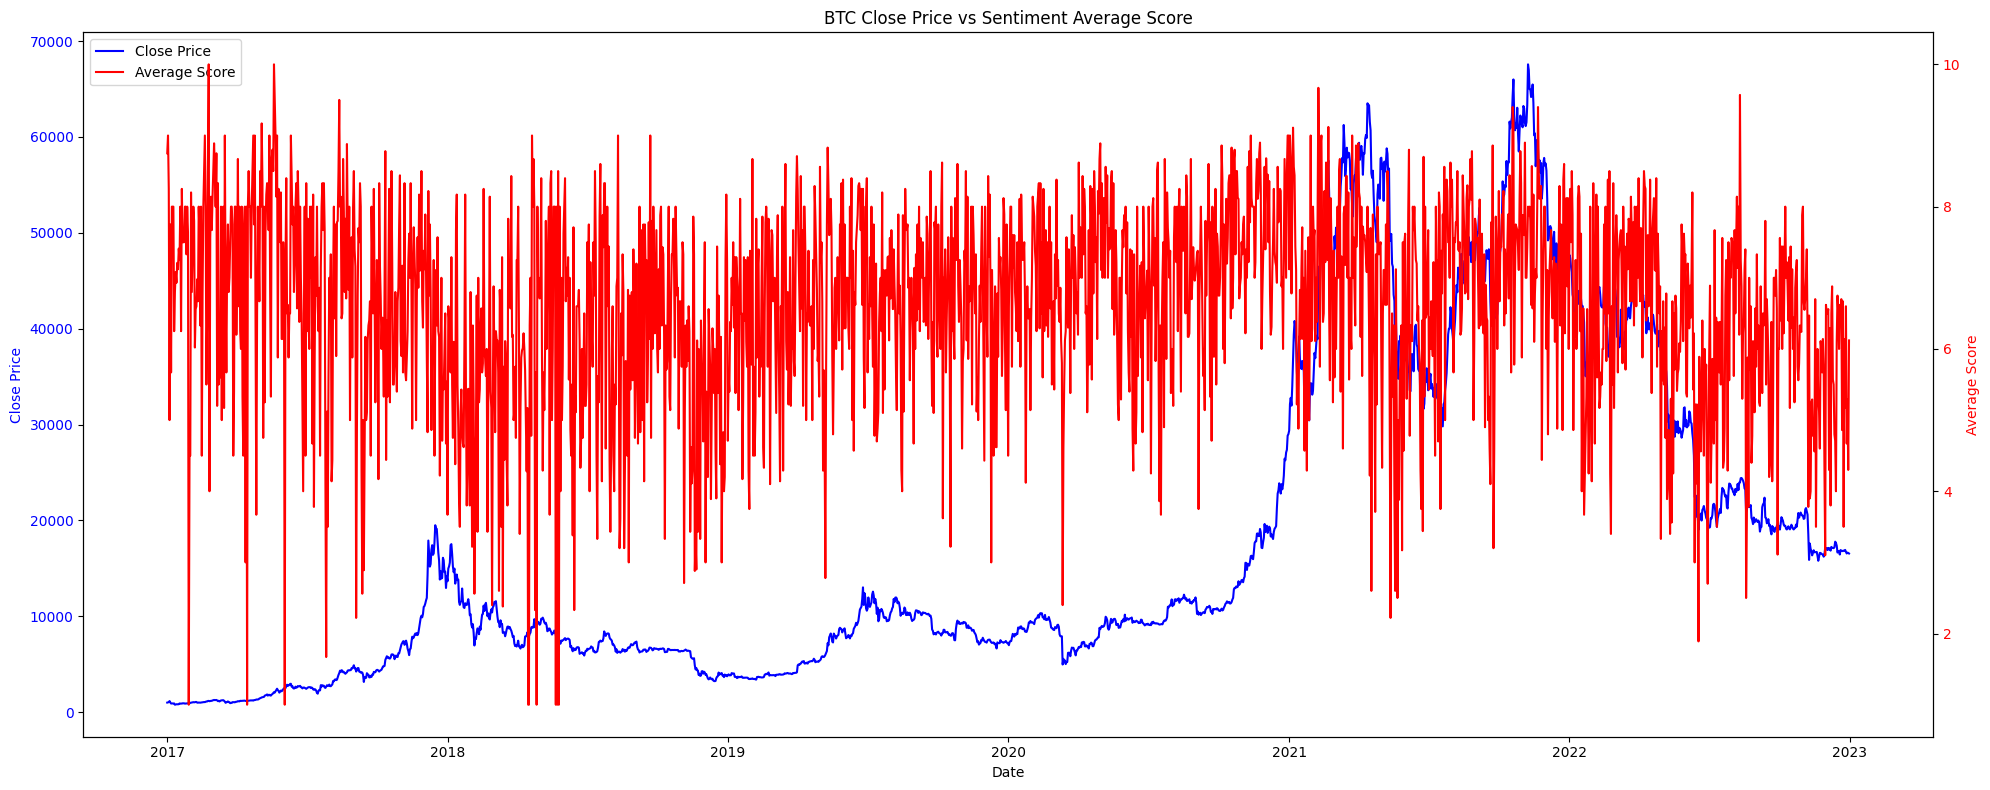

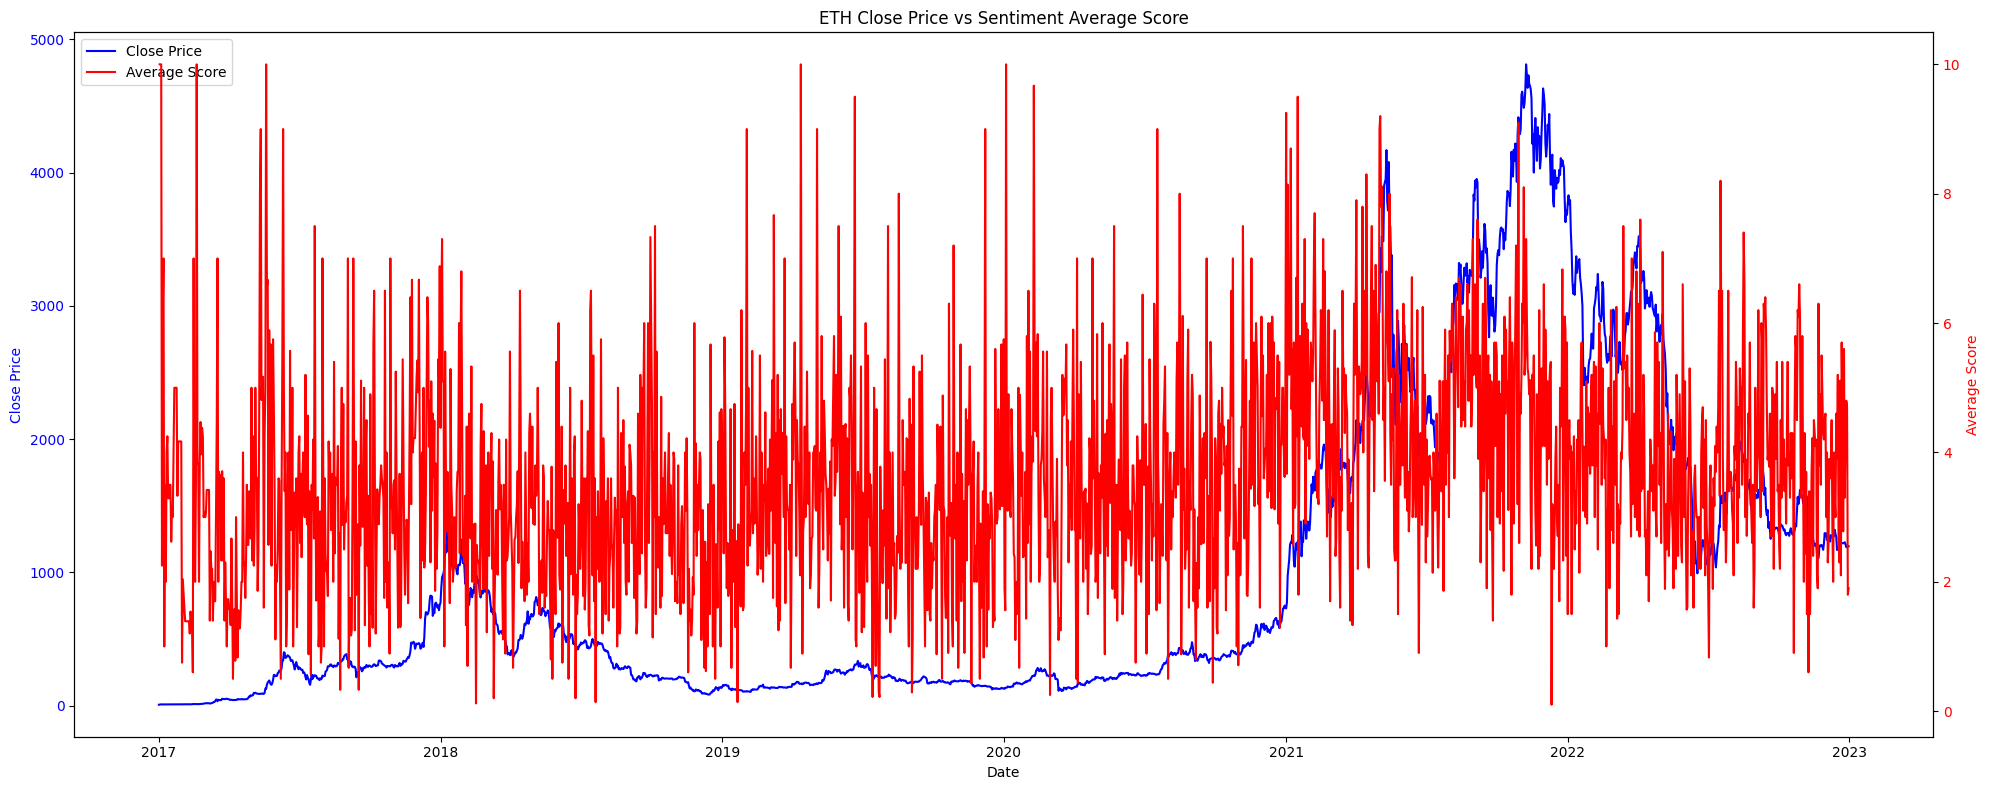

In [7]:
plt.figure(figsize=(20, 8))

# plot close on first y
ax1 = plt.gca()
ax1.plot(
    df_btc_original.index, df_btc_original["close"], color="blue", label="Close Price"
)
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Price", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# plot average_score on second y
ax2 = ax1.twinx()
ax2.plot(df_btc.index, df_btc["gnews_average_score"], color="red", label="Average Score")
ax2.set_ylabel("Average Score", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# title and legend
plt.title("BTC Close Price vs Sentiment Average Score")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 8))
ax1 = plt.gca()
ax1.plot(
    df_eth_original.index, df_eth_original["close"], color="blue", label="Close Price"
)
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Price", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax2 = ax1.twinx()
ax2.plot(df_eth.index, df_eth["gnews_average_score"], color="red", label="Average Score")
ax2.set_ylabel("Average Score", color="red")
ax2.tick_params(axis="y", labelcolor="red")
plt.title("ETH Close Price vs Sentiment Average Score")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()

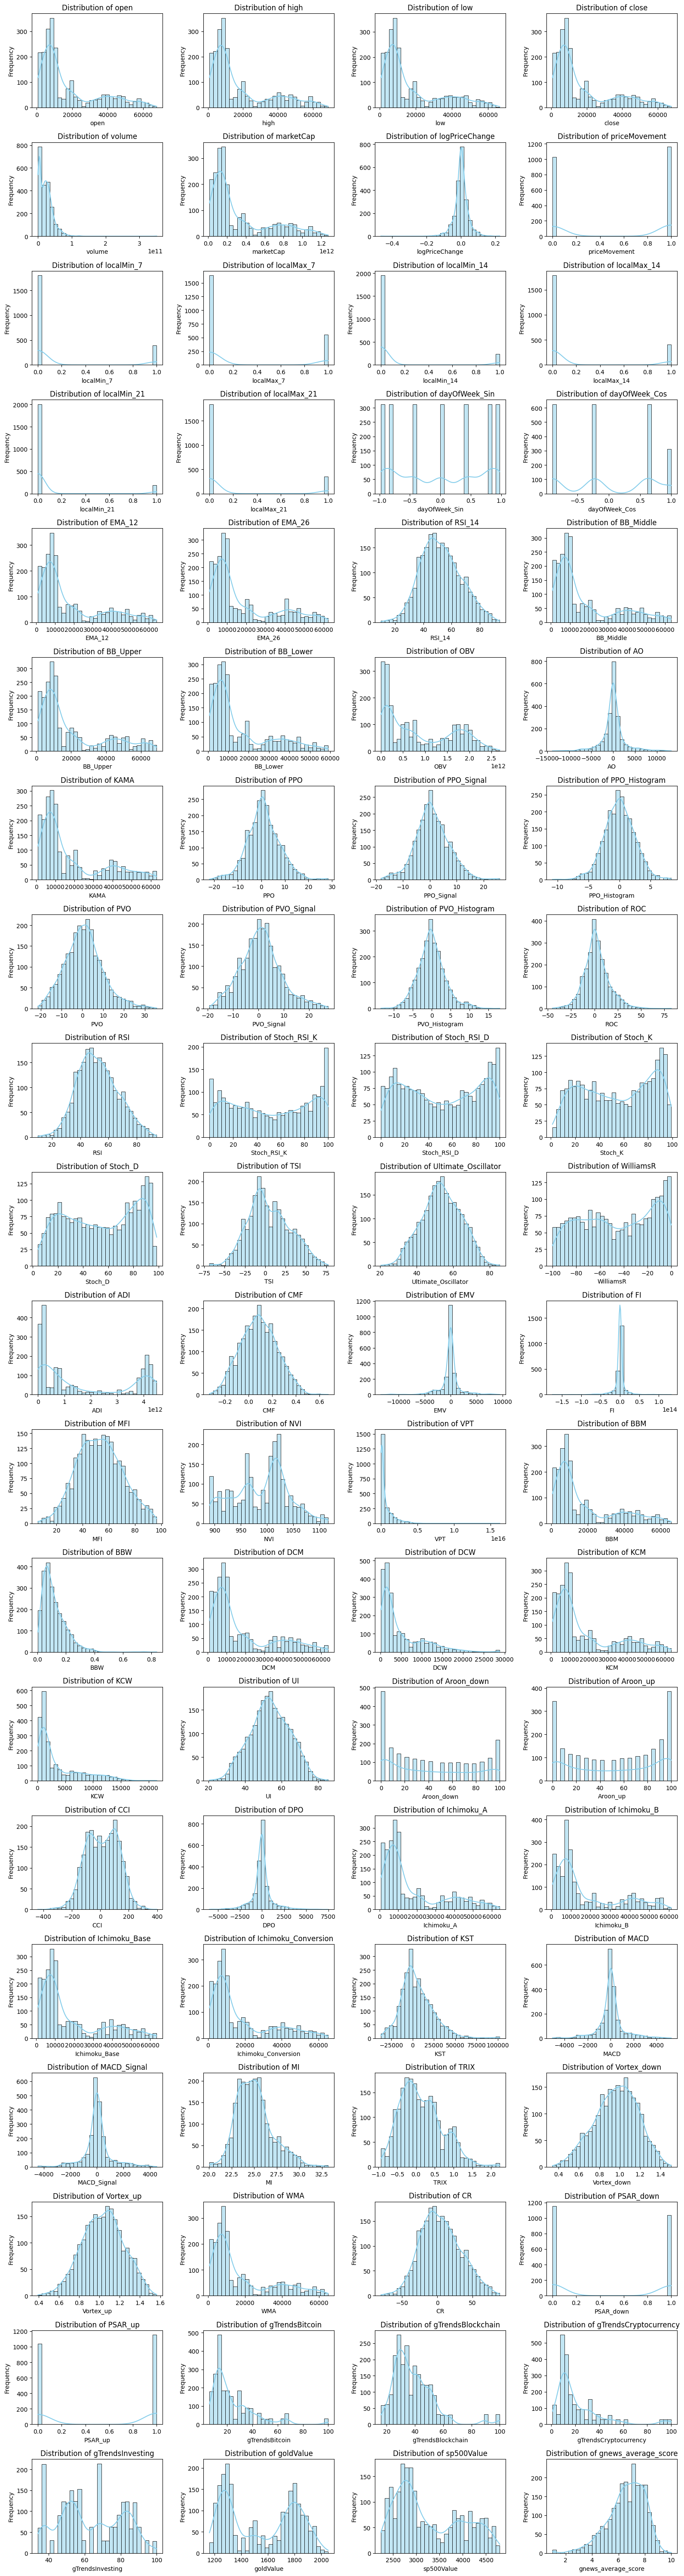

In [8]:
# list of features
features = df_btc.columns.tolist()

# set a grid with 4 columns
num_features = len(features)
cols = 4
rows = num_features // cols + int(num_features % cols > 0)

plt.figure(figsize=(cols * 4, rows * 3))


for idx, feature in enumerate(features):
    plt.subplot(rows, cols, idx + 1)
    sns.histplot(df_btc[feature], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

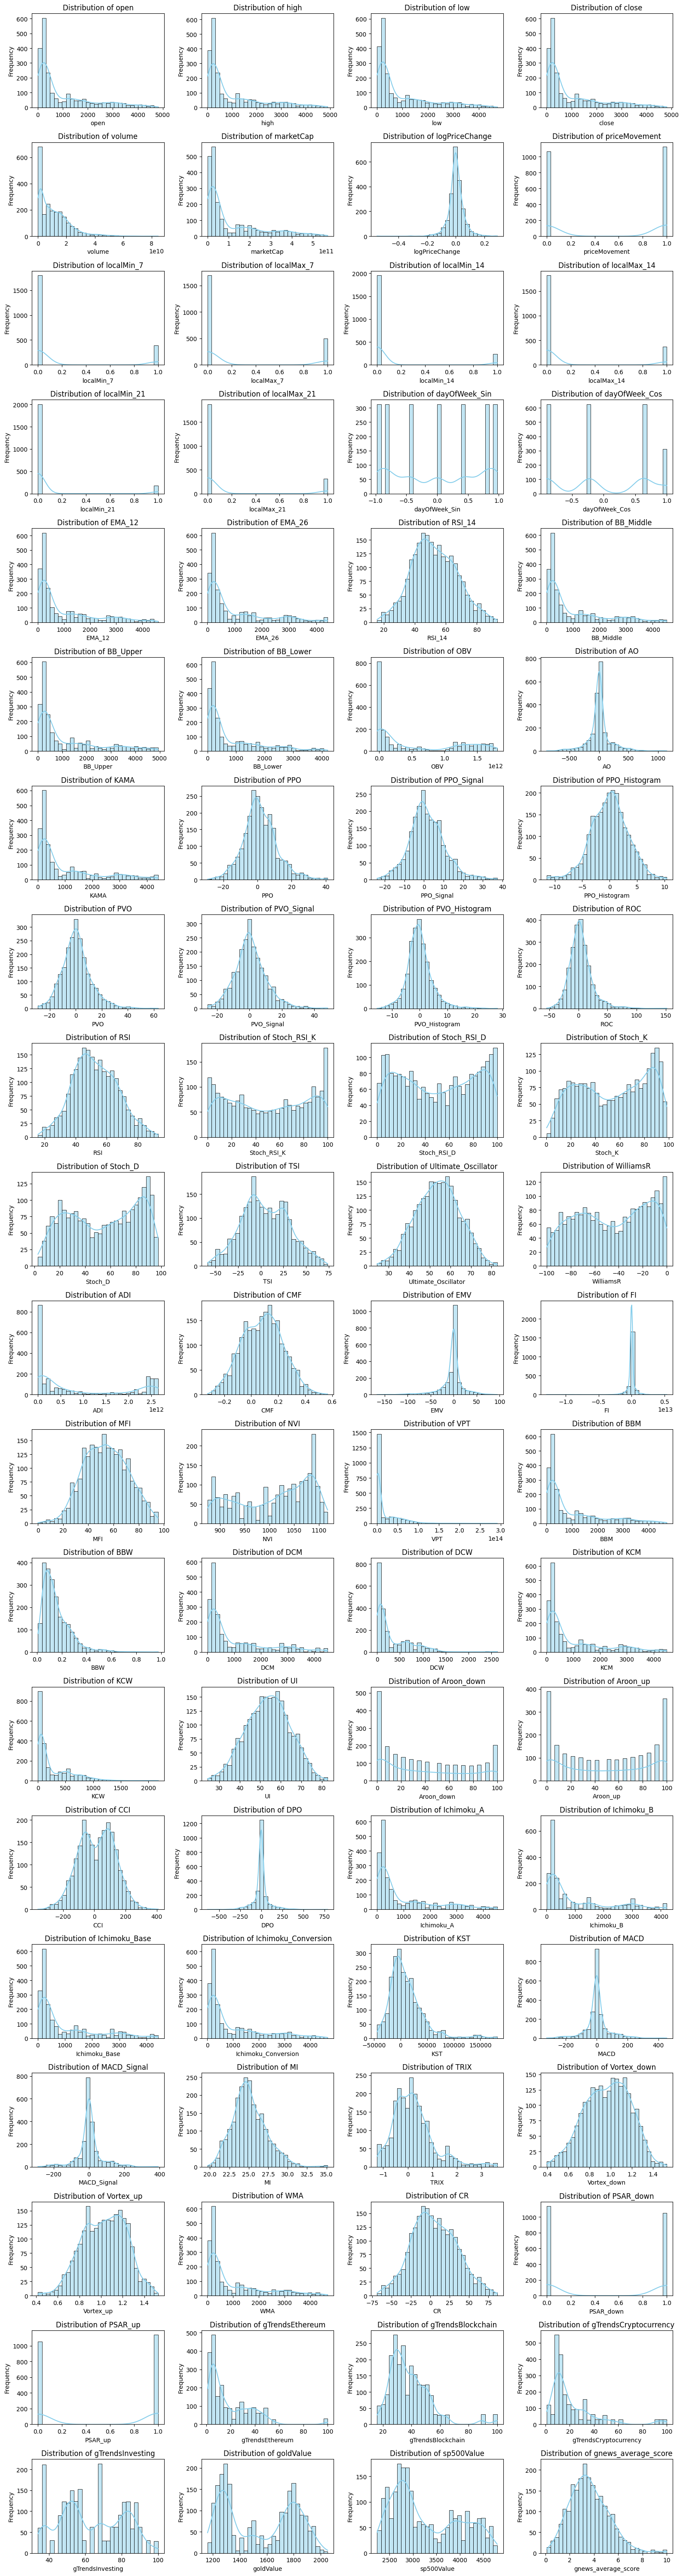

In [9]:
# list of features
features = df_eth.columns.tolist()

# set a grid with 4 columns
num_features = len(features)
cols = 4
rows = num_features // cols + int(num_features % cols > 0)

plt.figure(figsize=(cols * 4, rows * 3))


for idx, feature in enumerate(features):
    plt.subplot(rows, cols, idx + 1)
    sns.histplot(df_eth[feature], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()